<a href="https://colab.research.google.com/github/keymemory/Machine_Learning_Second/blob/main/ML2_day2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

< 분류 결정 트리 >

1.데이터 가져와서 학습하기
- 유방암 데이터셋을 이용하여 결정 트리를 활용한다.
- 데이터 셋을 읽고 훈련/테스트 세트로 나누고 완전한 트리 모델을 만든다

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier


In [ ]:
cancer = load_breast_cancer()

In [ ]:
# 훈련/테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify 
                                                    = cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state = 0)

In [ ]:
# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.937


2. 사전 가지치기를 통한 학습 능력 판단하기

In [ ]:
# coding: utf-8
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

In [ ]:
# 훈련/테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify 
                                                    = cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)

In [ ]:
# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 0.988
테스트 세트 점수: 0.951


3. 특성 중요도 확인

In [ ]:
# coding: utf-8
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

In [ ]:
# 훈련/테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify 
                                                    = cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)

In [ ]:
# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#특성 중요도
print("특성 중요도 : \n{}".format(tree.feature_importances_))

특성 중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


4. 특성 중요도 수평 막대그래프 그리기

In [ ]:
# coding: utf-8
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

In [ ]:
# 훈련/테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify 
                                                    = cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)

In [ ]:
# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#특성 중요도
print("특성 중요도 : \n{}".format(tree.feature_importances_))

특성 중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


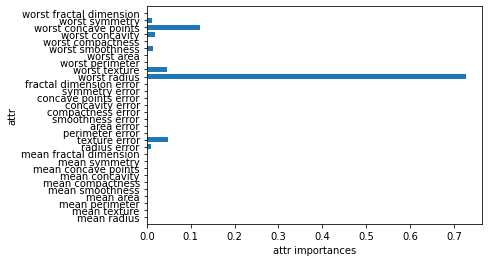

In [ ]:
# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("attr importances")
  plt.ylabel("attr")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)
plt.show()